<a href="https://cognitiveclass.ai"></a>

<h1 align=center><font size = 5>Clustering the Neighbourhoods of Business to Business Companies in US</font></h1>

## Importing the Required Modules

In [2]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes 
# uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\PremKumar\Anaconda3

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.7.12               |           py37_0         3.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-1.20.0               |             py_0          57 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.1 MB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-1.20.0-py_0

The following packages will be UPDATED:

  conda                      pkgs/main::conda-4.7.10-py37_0 --> conda-forge::conda-4.7.12-py37_0




geographiclib-1.50   | 



==> WARNING: A newer version of conda exists. <==
  current version: 4.7.10
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda




Libraries imported.


<a id='item1'></a>

## 1. Download and Explore Dataset

US_Companies data set contains more than 500 company details. In order to segement the neighborhoods of the selected domain companies and explore them, we will essentially need a dataset that contains the city and state details of the selected domain companies in United States and then we can explore them

Luckily, this dataset exists for free on the web. Link is as follows: http://www.opendata500.com/us/download/us_companies.csv

For my convenience, I have  downloaded the files and placed the csv file in the project directory, so that i can directly access the data

In [4]:
#!wget -q -O 'us_companies.csv' http://www.opendata500.com/us/download/us_companies.csv
print('Data downloaded!')

Data downloaded!


#### Load and explore the data

Next, let's load the data.

In [5]:
df=pd.read_csv('us_companies.csv')

Let's take a quick look at the data.

In [6]:
df.head()

company_name_id          company_name                          url  \
0  3-round-stones-inc  3 Round Stones, Inc.      http://3RoundStones.com   
1    48-factoring-inc     48 Factoring Inc.  https://www.48factoring.com   
2         5psolutions           5PSolutions          www.5psolutions.com   
3      abt-associates        Abt Associates                 abtassoc.com   
4              accela                Accela        http://www.accela.com   

   year_founded           city state country  zip_code full_time_employees  \
0        2010.0     Washington    DC      us   20004.0                1-10   
1        2014.0   Philadelphia    PA      us   19087.0              51-200   
2        2007.0        Fairfax    VA      us   22003.0                1-10   
3        1965.0      Cambridge    MA      us    2138.0         1,001-5,000   
4        1999.0      San Ramon    CA      us   94583.0           501-1,000   

  company_type       company_category  \
0      Private        Data/Technology   
1      Private   Finance & Investment   
2      Private        Data/Technology   
3      Private  Research & Consulting   
4      Private             Governance   

                                      revenue_source  \
0  Data analysis for clients, Database licensing,...   
1                                 Financial Services   
2  Subscriptions, User fees for web or mobile access   
3      Data analysis for clients, Database licensing   
4                            Not reported by company   

                                      business_model  \
0         Business to Business, Business to Consumer   
1                               Business to Business   
2  Business to Business, Business to Consumer, Bu...   
3                                                NaN   
4                               Business to Consumer   

                                       social_impact  \
0                                                NaN   
1                              Small Business Owners   
2                                                NaN   
3                                                NaN   
4  Citizen engagement and participation, Good gov...   

                                         description  \
0  3 Round Stones produces a platform for publish...   
1  The company mission is to provide finance to s...   
2  At 5PSolutions, we wish to make all basic info...   
3  Abt Associates is a mission-driven, internatio...   
4  Accela powers thousands of services and millio...   

                                   description_short source_count  \
0  Our Open Source platform is used by the Fortun...          NaN   
1  48 Factoring Inc. is one of the best financial...        11-50   
2      5PSolutions are artisans of mobile platforms.          NaN   
3  Abt Associates is a mission-driven, global lea...         101+   
4  Accela improves citizen engagement by making i...         101+   

                                  data_types example_uses  \
0                                        NaN          NaN   
1                                   Business          NaN   
2                                        NaN          NaN   
3                                        NaN          NaN   
4  Health/Healthcare, Housing, Public Safety          NaN   

                                        data_impacts  \
0                                                 []   
1  [u'Cost efficiency', u'Job growth', u'Revenue ...   
2                                                 []   
3                                                 []   
4                                                 []   

                                      financial_info  \
0  3 Round Stones is a profitable, self-funded, w...   
1                                                NaN   
2                                                NaN   
3                Employee-owned company. $552M/year.   
4                                                NaN   

                 last_updated

Notice how all the relevant data is in the *df* key, which is basically a list of all the company details. So, let' look at the columns

In [7]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

Let's take a look at the first  5 item in this list.

In [8]:
df.head()

company_name_id          company_name                          url  \
0  3-round-stones-inc  3 Round Stones, Inc.      http://3RoundStones.com   
1    48-factoring-inc     48 Factoring Inc.  https://www.48factoring.com   
2         5psolutions           5PSolutions          www.5psolutions.com   
3      abt-associates        Abt Associates                 abtassoc.com   
4              accela                Accela        http://www.accela.com   

   year_founded           city state country  zip_code full_time_employees  \
0        2010.0     Washington    DC      us   20004.0                1-10   
1        2014.0   Philadelphia    PA      us   19087.0              51-200   
2        2007.0        Fairfax    VA      us   22003.0                1-10   
3        1965.0      Cambridge    MA      us    2138.0         1,001-5,000   
4        1999.0      San Ramon    CA      us   94583.0           501-1,000   

  company_type       company_category  \
0      Private        Data/Technology   
1      Private   Finance & Investment   
2      Private        Data/Technology   
3      Private  Research & Consulting   
4      Private             Governance   

                                      revenue_source  \
0  Data analysis for clients, Database licensing,...   
1                                 Financial Services   
2  Subscriptions, User fees for web or mobile access   
3      Data analysis for clients, Database licensing   
4                            Not reported by company   

                                      business_model  \
0         Business to Business, Business to Consumer   
1                               Business to Business   
2  Business to Business, Business to Consumer, Bu...   
3                                                NaN   
4                               Business to Consumer   

                                       social_impact  \
0                                                NaN   
1                              Small Business Owners   
2                                                NaN   
3                                                NaN   
4  Citizen engagement and participation, Good gov...   

                                         description  \
0  3 Round Stones produces a platform for publish...   
1  The company mission is to provide finance to s...   
2  At 5PSolutions, we wish to make all basic info...   
3  Abt Associates is a mission-driven, internatio...   
4  Accela powers thousands of services and millio...   

                                   description_short source_count  \
0  Our Open Source platform is used by the Fortun...          NaN   
1  48 Factoring Inc. is one of the best financial...        11-50   
2      5PSolutions are artisans of mobile platforms.          NaN   
3  Abt Associates is a mission-driven, global lea...         101+   
4  Accela improves citizen engagement by making i...         101+   

                                  data_types example_uses  \
0                                        NaN          NaN   
1                                   Business          NaN   
2                                        NaN          NaN   
3                                        NaN          NaN   
4  Health/Healthcare, Housing, Public Safety          NaN   

                                        data_impacts  \
0                                                 []   
1  [u'Cost efficiency', u'Job growth', u'Revenue ...   
2                                                 []   
3                                                 []   
4                                                 []   

                                      financial_info  \
0  3 Round Stones is a profitable, self-funded, w...   
1                                                NaN   
2                                                NaN   
3                Employee-owned company. $552M/year.   
4                                                NaN   

                 last_updated

#### Tranform the data into a *processable* dataframe

The next task is essentially transforming this data into a  *processable* dataframe. So let's start

#### Replace the Mismatch Values

Business to Government, "Business to Business, Business to Consumer",
"Business to Business, Business to Consumer, Business to Government", have similar type of entries and can be differentiated only by , values

In [11]:
df['business_model'].value_counts()

Business to Business                                                            172
Business to Consumer                                                            114
Business to Business, Business to Consumer                                       63
Business to Business, Business to Government                                     31
Business to Business, Business to Consumer, Business to Government               19
Business to Government                                                           12
Business to Consumer, Business to Government                                      9
Business to Business, academia                                                    4
Business to Government, nonprofit                                                 4
Business to Business, Business to Government, academia                            3
nonprofit                                                                         3
Business to Business, nonprofit                                             

In [13]:
df.replace(to_replace='Business to Government, ',value='Business to Government',inplace=True)

In [17]:
df.replace(to_replace='Business to Business, Business to Consumer, Business to Government, ',value='Business to Business, Business to Consumer, Business to Government',inplace=True)

In [22]:
df.replace(to_replace='Business to Business, Business to Consumer,',value='Business to Business, Business to Consumer',inplace=True)

In [24]:
df.replace(to_replace='nonprofit',value='Nonprofit',inplace=True)

In [25]:
df['business_model'].value_counts()

Business to Business                                                            172
Business to Consumer                                                            114
Business to Business, Business to Consumer                                       64
Business to Business, Business to Government                                     31
Business to Business, Business to Consumer, Business to Government               20
Business to Government                                                           13
Business to Consumer, Business to Government                                      9
Business to Business, academia                                                    4
Nonprofit                                                                         4
Business to Government, nonprofit                                                 4
Business to Business, Business to Government, academia                            3
Business to Business, Business to Consumer, Business to Government, academia

#### Visualize the different business model categories and their count using bar chart

I have created new data frame that contains the value count of each values in business_model column

In [29]:
business_mod =df['business_model'].value_counts().to_frame()

In [31]:
business_mod.reset_index(inplace=True)

In [32]:
business_mod.head()

index  business_model
0                               Business to Business             172
1                               Business to Consumer             114
2         Business to Business, Business to Consumer              64
3       Business to Business, Business to Government              31
4  Business to Business, Business to Consumer, Bu...              20

In [33]:
business_mod.rename(columns={'index':'Business_model','business_model':'Total'},inplace=True)

In [34]:
import matplotlib.pyplot as plt

### Lets create a barchar and visualize it 

<BarContainer object of 23 artists>

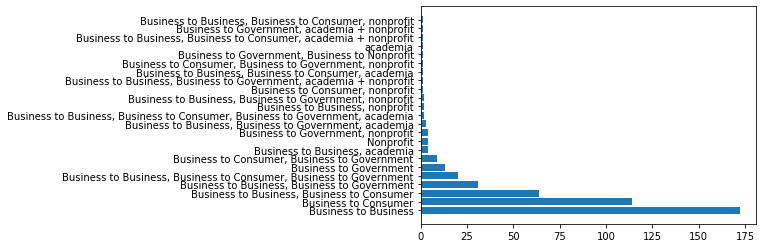

In [35]:
plt.barh(business_mod['Business_model'],business_mod['Total'])

In [36]:
business_mod.head()

Business_model  Total
0                               Business to Business    172
1                               Business to Consumer    114
2         Business to Business, Business to Consumer     64
3       Business to Business, Business to Government     31
4  Business to Business, Business to Consumer, Bu...     20

### Remove the unnecessary info that is not needed when we process the data frame

In [37]:
df.columns

Index(['company_name_id', 'company_name', 'url', 'year_founded', 'city',
       'state', 'country', 'zip_code', 'full_time_employees', 'company_type',
       'company_category', 'revenue_source', 'business_model', 'social_impact',
       'description', 'description_short', 'source_count', 'data_types',
       'example_uses', 'data_impacts', 'financial_info', 'last_updated'],
      dtype='object')

In [38]:
df.drop(columns=['company_name_id','url','country','social_impact','last_updated','source_count','description_short','social_impact','example_uses'],inplace=True)

In [39]:
df.head()

company_name  year_founded           city state  zip_code  \
0  3 Round Stones, Inc.        2010.0     Washington    DC   20004.0   
1     48 Factoring Inc.        2014.0   Philadelphia    PA   19087.0   
2           5PSolutions        2007.0        Fairfax    VA   22003.0   
3        Abt Associates        1965.0      Cambridge    MA    2138.0   
4                Accela        1999.0      San Ramon    CA   94583.0   

  full_time_employees company_type       company_category  \
0                1-10      Private        Data/Technology   
1              51-200      Private   Finance & Investment   
2                1-10      Private        Data/Technology   
3         1,001-5,000      Private  Research & Consulting   
4           501-1,000      Private             Governance   

                                      revenue_source  \
0  Data analysis for clients, Database licensing,...   
1                                 Financial Services   
2  Subscriptions, User fees for web or mobile access   
3      Data analysis for clients, Database licensing   
4                            Not reported by company   

                                      business_model  \
0         Business to Business, Business to Consumer   
1                               Business to Business   
2  Business to Business, Business to Consumer, Bu...   
3                                                NaN   
4                               Business to Consumer   

                                         description  \
0  3 Round Stones produces a platform for publish...   
1  The company mission is to provide finance to s...   
2  At 5PSolutions, we wish to make all basic info...   
3  Abt Associates is a mission-driven, internatio...   
4  Accela powers thousands of services and millio...   

                                  data_types  \
0                                        NaN   
1                                   Business   
2                                        NaN   
3                                        NaN   
4  Health/Healthcare, Housing, Public Safety   

                                        data_impacts  \
0                                                 []   
1  [u'Cost efficiency', u'Job growth', u'Revenue ...   
2                                                 []   
3                                                 []   
4                                                 []   

                                      financial_info  
0  3 Round Stones is a profitable, self-funded, w...  
1                                                NaN  
2                                                NaN  
3                Employee-owned company. $552M/year.  
4                                                NaN

In [40]:
df.drop(columns=['financial_info','data_types','description'],inplace=True)

### Drop rows that contains NAN Values 

Our main column is city and business_model. Since the number of rows that has NAN values in these columns are less, we can simply remove those rows

In [41]:
df.dropna(subset=['business_model','city'],axis=0,inplace=True)

In [42]:
df.isnull().sum(axis=0)

company_name            0
year_founded            0
city                    0
state                   0
zip_code                7
full_time_employees    10
company_type            7
company_category        2
revenue_source          6
business_model          0
data_impacts            0
dtype: int64

In [43]:
df.shape

(426, 11)

In [44]:
df.columns

Index(['company_name', 'year_founded', 'city', 'state', 'zip_code',
       'full_time_employees', 'company_type', 'company_category',
       'revenue_source', 'business_model', 'data_impacts'],
      dtype='object')

### Creating new *Features* data frame that is  Company_data

In [45]:
company_data=df[['company_name','city','state','company_type','business_model']]

In [46]:
company_data.head()

company_name           city state company_type  \
0  3 Round Stones, Inc.     Washington    DC      Private   
1     48 Factoring Inc.   Philadelphia    PA      Private   
2           5PSolutions        Fairfax    VA      Private   
4                Accela      San Ramon    CA      Private   
5             Accenture        Chicago    IL       Public   

                                      business_model  
0         Business to Business, Business to Consumer  
1                               Business to Business  
2  Business to Business, Business to Consumer, Bu...  
4                               Business to Consumer  
5                               Business to Business

In [47]:
company_data[['BusinessModelLabel']]=company_data[['business_model']]

C:\Users\PremKumar\Anaconda3\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [48]:
company_data.head()

company_name           city state company_type  \
0  3 Round Stones, Inc.     Washington    DC      Private   
1     48 Factoring Inc.   Philadelphia    PA      Private   
2           5PSolutions        Fairfax    VA      Private   
4                Accela      San Ramon    CA      Private   
5             Accenture        Chicago    IL       Public   

                                      business_model  \
0         Business to Business, Business to Consumer   
1                               Business to Business   
2  Business to Business, Business to Consumer, Bu...   
4                               Business to Consumer   
5                               Business to Business   

                                  BusinessModelLabel  
0         Business to Business, Business to Consumer  
1                               Business to Business  
2  Business to Business, Business to Consumer, Bu...  
4                               Business to Consumer  
5                               Business to Business

In [49]:
company_data['business_model'].unique()

array(['Business to Business, Business to Consumer',
       'Business to Business',
       'Business to Business, Business to Consumer, Business to Government',
       'Business to Consumer', 'Business to Government',
       'Business to Business, Business to Government',
       'Business to Business, Business to Government, academia',
       'Business to Consumer, Business to Government', 'Nonprofit',
       'Business to Business, Business to Government, nonprofit',
       'Business to Business, academia',
       'Business to Government, Business to Nonprofit',
       'Business to Business, nonprofit',
       'Business to Consumer, Business to Government, nonprofit',
       'Business to Government, nonprofit', 'academia',
       'Business to Business, Business to Consumer, Business to Government, academia',
       'Business to Business, Business to Consumer, academia',
       'Business to Business, Business to Government, academia + nonprofit',
       'Business to Consumer, nonprofit'

In [50]:
company_data.columns

Index(['company_name', 'city', 'state', 'company_type', 'business_model',
       'BusinessModelLabel'],
      dtype='object')

In [58]:
company_data.dtypes

company_name          object
city                  object
state                 object
company_type          object
business_model        object
BusinessModelLabel    object
dtype: object

In [57]:
company_data['BusinessModelLabel'].astype(str)

0             Business to Business, Business to Consumer
1                                   Business to Business
2      Business to Business, Business to Consumer, Bu...
4                                   Business to Consumer
5                                   Business to Business
6      Business to Business, Business to Consumer, Bu...
7                                   Business to Business
8                                   Business to Business
9                                 Business to Government
10            Business to Business, Business to Consumer
11                                  Business to Consumer
12                                  Business to Consumer
13     Business to Business, Business to Consumer, Bu...
14                                  Business to Consumer
15                                  Business to Consumer
16                                  Business to Business
18            Business to Business, Business to Consumer
19            Business to Busin

#### Changing Business_Model values into Numerical Values for easy processing

In [60]:
company_data['BusinessModelLabel'].replace(to_replace=['Business to Business, Business to Consumer',
       'Business to Business',
       'Business to Business, Business to Consumer, Business to Government',
       'Business to Consumer', 'Business to Government',
       'Business to Business, Business to Government',
       'Business to Business, Business to Government, academia',
       'Business to Consumer, Business to Government', 'Nonprofit',
       'Business to Business, Business to Government, nonprofit',
       'Business to Business, academia',
       'Business to Government, Business to Nonprofit',
       'Business to Business, nonprofit',
       'Business to Consumer, Business to Government, nonprofit',
       'Business to Government, nonprofit', 'academia',
       'Business to Business, Business to Consumer, Business to Government, academia',
       'Business to Business, Business to Consumer, academia',
       'Business to Business, Business to Government, academia + nonprofit',
       'Business to Consumer, nonprofit',
       'Business to Business, Business to Consumer, academia + nonprofit',
       'Business to Government, academia + nonprofit',
       'Business to Business, Business to Consumer, nonprofit'],value=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22],inplace=True)

C:\Users\PremKumar\Anaconda3\lib\site-packages\pandas\core\generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [61]:
company_data.head()

company_name           city state company_type  \
0  3 Round Stones, Inc.     Washington    DC      Private   
1     48 Factoring Inc.   Philadelphia    PA      Private   
2           5PSolutions        Fairfax    VA      Private   
4                Accela      San Ramon    CA      Private   
5             Accenture        Chicago    IL       Public   

                                      business_model  BusinessModelLabel  
0         Business to Business, Business to Consumer                   0  
1                               Business to Business                   1  
2  Business to Business, Business to Consumer, Bu...                   2  
4                               Business to Consumer                   3  
5                               Business to Business                   1

In [62]:
company_data['BusinessModelLabel'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

## Getting Location data Using OpenCase library

#### Installing the Open Case Package

In [64]:
pip install opencage

Note: you may need to restart the kernel to use updated packages.


In [65]:
from opencage.geocoder import OpenCageGeocode

### Getting the Key Value

In [66]:
key ='c586471a73ac4ffd8ade18771ea15dc2'
geocoder = OpenCageGeocode(key)

In [67]:
company_data['state'].unique()

array(['DC', 'PA', 'VA', 'CA', 'IL', 'AR', 'NY', 'MA', 'IN', 'RI', 'TX',
       'WA', 'NC', 'WI', 'GA', 'CT', 'TN', 'MO', 'OH', 'NJ', 'CO', 'MD',
       'MI', 'UT', 'FL', 'OR', 'KA', 'MT', 'AZ', 'ME', 'VT', 'MN', 'AL',
       'NH', 'NV', 'OK', 'KY'], dtype=object)

### Using GeoCode function, Getting the Location Deatils and Printing it

In [68]:
City='Washington'
State='DC'
query = str(City)+','+str(State)
results = geocoder.geocode(query)   
lat = results[0]['geometry']['lat']
long = results[0]['geometry']['lng']
print(lat)
print(long)

38.8948932
-77.0365529


### Getting the location details of all the companies and adding the location columns

In [69]:
company_data.head()

company_name           city state company_type  \
0  3 Round Stones, Inc.     Washington    DC      Private   
1     48 Factoring Inc.   Philadelphia    PA      Private   
2           5PSolutions        Fairfax    VA      Private   
4                Accela      San Ramon    CA      Private   
5             Accenture        Chicago    IL       Public   

                                      business_model  BusinessModelLabel  
0         Business to Business, Business to Consumer                   0  
1                               Business to Business                   1  
2  Business to Business, Business to Consumer, Bu...                   2  
4                               Business to Consumer                   3  
5                               Business to Business                   1

In [70]:
list_lat = []   # create empty lists

list_long = []


for index, row in company_data.iterrows(): # iterate over rows in dataframe
    City = row['city']
    State = row['state']       
    query = str(City)+','+str(State)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']
    list_lat.append(lat)
    list_long.append(long)

print('Completed')
# create new columns from lists    

#company_data['lat'] = list_lat   

#company_data['lon'] = list_long

Completed


In [71]:
company_data['lat'] = list_lat   

company_data['lon'] = list_long

C:\Users\PremKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\PremKumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
company_data.head()

company_name           city state company_type  \
0  3 Round Stones, Inc.     Washington    DC      Private   
1     48 Factoring Inc.   Philadelphia    PA      Private   
2           5PSolutions        Fairfax    VA      Private   
4                Accela      San Ramon    CA      Private   
5             Accenture        Chicago    IL       Public   

                                      business_model  BusinessModelLabel  \
0         Business to Business, Business to Consumer                   0   
1                               Business to Business                   1   
2  Business to Business, Business to Consumer, Bu...                   2   
4                               Business to Consumer                   3   
5                               Business to Business                   1   

         lat         lon  
0  38.894893  -77.036553  
1  39.952724  -75.163526  
2  38.846224  -77.306373  
4  37.779927 -121.978015  
5  41.875562  -87.624421

### Creating a map for US 

In [73]:
latitude=37.0902
longitude=-95.7129

In [74]:
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=4)
map_newyork

### Clustering different business model companies into different clusters and visualize the map

In [75]:
map_comp = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=23
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['BusinessModelLabel']):
    label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_comp)
       
map_comp

###  Visualizing the locations of all the business_model companies alone in the map

In [81]:
map_comp1 = folium.Map(location=[latitude, longitude], zoom_start=5)
kclusters=23
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
for lat, lon,company_name,cluster in zip(company_data['lat'], company_data['lon'], company_data['company_name'],company_data['BusinessModelLabel']):
    if(cluster==0):
        label = folium.Popup(str(company_name) + ' Cluster ' + str(cluster), parse_html=True)
        folium.CircleMarker(
            [lat, lon],
            radius=5,
            popup=label,
            color=rainbow[cluster-1],
            fill=True,
            fill_color=rainbow[cluster-1],
            fill_opacity=0.7).add_to(map_comp1)
map_comp1

Quickly examine the resulting dataframe.

In [79]:
company_data['business_model'].value_counts()

Business to Business                                                            164
Business to Consumer                                                            103
Business to Business, Business to Consumer                                       60
Business to Business, Business to Government                                     31
Business to Business, Business to Consumer, Business to Government               19
Business to Government                                                           12
Business to Consumer, Business to Government                                      7
Business to Business, academia                                                    4
Nonprofit                                                                         4
Business to Government, nonprofit                                                 4
Business to Business, Business to Government, academia                            3
Business to Business, Business to Consumer, Business to Government, academia

## Creating new data frame and storing only the Business to Business company details in it

In [82]:
austin_data=company_data[company_data['business_model']=='Business to Business'].reset_index(drop=True)
austin_data.head(10)

company_name              city state  \
0                        48 Factoring Inc.      Philadelphia    PA   
1                                Accenture           Chicago    IL   
2                                   Acxiom       Little Rock    AR   
3                                 Adaptive            Irvine    CA   
4                                   Altova           Beverly    MA   
5                             ASC Partners            Boston    MA   
6                                   Asset4          New York    NY   
7                                   AtSite  Washington, D.C.    DC   
8  Aureus Sciences (*Now part of Elsevier)      Philadelphia    PA   
9                                   Ayasdi        Menlo Park    CA   

  company_type        business_model  BusinessModelLabel        lat  \
0      Private  Business to Business                   1  39.952724   
1       Public  Business to Business                   1  41.875562   
2       Public  Business to Business                   1  34.746481   
3      Private  Business to Business                   1  49.958444   
4      Private  Business to Business                   1  42.558428   
5  partnership  Business to Business                   1  42.360253   
6      Private  Business to Business                   1  40.712728   
7      Private  Business to Business                   1  38.894893   
8      Private  Business to Business                   1  39.952724   
9      Private  Business to Business                   1  37.451967   

          lon  
0  -75.163526  
1  -87.624421  
2  -92.289595  
3 -110.273261  
4  -70.880049  
5  -71.058291  
6  -74.006015  
7  -77.036553  
8  -75.163526  
9 -122.177993

In [84]:
austin_data.shape

(164, 8)

#### Just checking for one row

In [85]:
latti=austin_data.loc[0,'lat']
longi=austin_data.loc[0,'lon']

city_name=austin_data.loc[0,'city']
print(latti,longi,city_name)

39.9527237 -75.1635262  Philadelphia


## Connecting to Four Square API

In [86]:
CLIENT_ID = 'LZVG4ODYX3NJSFQ5N4A0YLHCBDZBHN5I40YZO2KGJ5MDBFM4' # your Foursquare ID
CLIENT_SECRET = 'FOLMQI0WUXZ2025XL0ZOVRW4G2AXLUDGEIPHPV1XIS5UG4JG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: LZVG4ODYX3NJSFQ5N4A0YLHCBDZBHN5I40YZO2KGJ5MDBFM4
CLIENT_SECRET:FOLMQI0WUXZ2025XL0ZOVRW4G2AXLUDGEIPHPV1XIS5UG4JG


In [87]:
LIMIT = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latti, 
    longi, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=LZVG4ODYX3NJSFQ5N4A0YLHCBDZBHN5I40YZO2KGJ5MDBFM4&client_secret=FOLMQI0WUXZ2025XL0ZOVRW4G2AXLUDGEIPHPV1XIS5UG4JG&v=20180605&ll=39.9527237,-75.1635262&radius=500&limit=100'

### Getting the neighbourhood details using Four Square API

In [88]:
import requests
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5dbd309e6b9b490020819321'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Avenue of the Arts South',
  'headerFullLocation': 'Avenue of the Arts South, Philadelphia',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 224,
  'suggestedBounds': {'ne': {'lat': 39.9572237045, 'lng': -75.15766688416949},
   'sw': {'lat': 39.9482236955, 'lng': -75.16938551583053}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bde0d566198c9b6c5cc12ff',
       'name': 'Dilworth Park',
       'location': {'address': '1 Penn Sq',
        'crossStreet': 'West Side of City Hall',
        'lat': 39.952771846343104,

### Categorizing the Neighbourhood venues

In [89]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [90]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(10)

name           categories        lat        lng
0                   Dilworth Park                 Park  39.952772 -75.164723
1      La Colombe Coffee Roasters          Coffee Shop  39.951659 -75.165238
2             City Hall Courtyard                Plaza  39.952484 -75.163592
3                    Fogo De Chão         Churrascaria  39.950917 -75.162971
4  The Ritz-Carlton, Philadelphia                Hotel  39.951446 -75.164149
5             The Wanamaker Organ         Concert Hall  39.951536 -75.162752
6           JFK Plaza / Love Park                Plaza  39.954123 -75.165303
7        Philadelphia Film Center        Movie Theater  39.950835 -75.164683
8             Blick Art Materials  Arts & Crafts Store  39.950621 -75.163159
9              The Capital Grille  American Restaurant  39.950716 -75.163942

**Folium** is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

#### Creating a New Map and visualizing only the Business to Business companies locations in the map

In [91]:
# create map of Manhattan using latitude and longitude values
map_comp3 = folium.Map(location=[latti, longi], zoom_start=4)

# add markers to map
for lat, lng, label in zip(austin_data['lat'], austin_data['lon'], austin_data['city']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='red',
        fill_opacity=0.7,
        parse_html=False).add_to(map_comp3)  
    
map_comp3

### Get Near By Venues of all the Business to Business companies

In [92]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [95]:
comp_venues = getNearbyVenues(names=austin_data['city'],
                                   latitudes=austin_data['lat'],
                                   longitudes=austin_data['lon']
                                  )

 Philadelphia
Chicago
Little Rock
Irvine
Beverly
Boston
New York
Washington, D.C.
Philadelphia
Menlo Park
Chicago
New York
San Diego
Milwaukee
McLean
Boston
New York
Brentwood
New York
Boston
New York
Houston
Houston
New York
North Kansas City
New York
Palo Alto
San Francisco
Millbrae
Menlo Park
Bristow
Menlo Park
Denver
Oregon House
Rockville
New Brunswick
Cedar City
Cincinnati
Westminster
Miami
New York
New York
New York
Atlanta
Ridgefield
Cupertino
Hopkinton
Boston
New York
Santa Monica
Falls Church
Milford
Plano
Atlanta
Redwood City
New York
Bethesda
Manassas
Norwalk
Los Angeles
Ann Arbor
Washington
Greensboro
New York
Houston
Newton
New York
Cambridge
San Francisco
Sugar Land
Washington
El Segundo
San Francisco
Chicago
Miami
Bozeman
Vienna
San Francisco
St. Louis
Cambridge
San Francisco
New York
Tempe
Madison
New York
Chicago
Columbia
Danbury
Bala Cynwyd
Redwood City
Austin
New York
Bowie
New York
Scotsdale
Sutton
Portland
Neenah
Mountain View
New York
New York
New York
Boston
New

In [96]:
comp_venues.head()

City   Latitude  Longitude                           Venue  \
0   Philadelphia  39.952724 -75.163526                   Dilworth Park   
1   Philadelphia  39.952724 -75.163526      La Colombe Coffee Roasters   
2   Philadelphia  39.952724 -75.163526             City Hall Courtyard   
3   Philadelphia  39.952724 -75.163526                    Fogo De Chão   
4   Philadelphia  39.952724 -75.163526  The Ritz-Carlton, Philadelphia   

   Venue Latitude  Venue Longitude Venue Category  
0       39.952772       -75.164723           Park  
1       39.951659       -75.165238    Coffee Shop  
2       39.952484       -75.163592          Plaza  
3       39.950917       -75.162971   Churrascaria  
4       39.951446       -75.164149          Hotel

In [97]:
comp_venues.groupby('City').count()

Latitude  Longitude  Venue  Venue Latitude  \
City                                                               
 Philadelphia              100        100    100             100   
Addison                     21         21     21              21   
Ann Arbor                    4          4      4               4   
Atlanta                     27         27     27              27   
Austin                     225        225    225             225   
Bala Cynwyd                  6          6      6               6   
Bethesda                   100        100    100             100   
Beverly                     16         16     16              16   
Boston                     700        700    700             700   
Boulder                     12         12     12              12   
Bowie                       64         64     64              64   
Bozeman                     32         32     32              32   
Brentwood                   16         16     16              16   
Bristow                      3          3      3               3   
Cambridge                   72         72     72              72   
Cary                        46         46     46              46   
Cedar City                  30         30     30              30   
Chicago                    500        500    500             500   
Chino Hills                 16         16     16              16   
Cincinnati                 100        100    100             100   
Columbia                    95         95     95              95   
Cupertino                   39         39     39              39   
Danbury                     37         37     37              37   
Deerfield Beach             11         11     11              11   
Denver                     140        140    140             140   
El Segundo                  59         59     59              59   
Falls Church                51         51     51              51   
Fishers                     41         41     41              41   
Greensboro                  38         38     38              38   
Hopkinton                   14         14     14              14   
Houston                    180        180    180             180   
Indianapolis               100        100    100             100   
Irvine                       4          4      4               4   
Kennesaw                    18         18     18              18   
Little Rock                 11         11     11              11   
Los Angeles                 36         36     36              36   
Madison                     21         21     21              21   
Manchester                   8          8      8               8   
Maryland Heights            17         17     17              17   
McLean                      48         48     48              48   
Menlo Park                 184        184    184             184   
Miami                      100        100    100             100   
Milford                     23         23     23              23   
Millbrae                    52         52     52              52   
Milwaukee                   23         23     23              23   
Neenah                      25         25     25              25   
New Brunswick                7          7      7               7   
New York                  3300       3300   3300            3300   
Newton                       1          1      1               1   
Newtown Square              38         38     38              38   
Norman                      34         34     34              34   
North Kansas City           20         20     20              20   
Norwalk                     18         18     18              18   
Palo Alto                  186        186    186             186   
Philadelphia               100        100    100             100   
Plano                        2          2      2               2   
Portland                    10         10     10              10   
Redwood Ci

### Doing one hot encoding to convert categorical values into numerical columns

In [98]:
# one hot encoding
comp_onehot = pd.get_dummies(comp_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
comp_onehot['City'] = comp_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [comp_onehot.columns[-1]] + list(comp_onehot.columns[:-1])
comp_onehot = comp_onehot[fixed_columns]

comp_onehot.head()

Yoga Studio  ATM  Accessories Store  Adult Boutique  Afghan Restaurant  \
0            0    0                  0               0                  0   
1            0    0                  0               0                  0   
2            0    0                  0               0                  0   
3            0    0                  0               0                  0   
4            0    0                  0               0                  0   

   African Restaurant  Airport  American Restaurant  Antique Shop  Aquarium  \
0                   0        0                    0             0         0   
1                   0        0                    0             0         0   
2                   0        0                    0             0         0   
3                   0        0                    0             0         0   
4                   0        0                    0             0         0   

   Arcade  Arepa Restaurant  Art Gallery  Art Museum  Arts & Crafts Store  \
0       0                 0            0           0                    0   
1       0                 0            0           0                    0   
2       0                 0            0           0                    0   
3       0                 0            0           0                    0   
4       0                 0            0           0                    0   

   Asian Restaurant  Athletics & Sports  Auto Workshop  Automotive Shop  \
0                 0                   0              0                0   
1                 0                   0              0                0   
2                 0                   0              0                0   
3                 0                   0              0                0   
4                 0                   0              0                0   

   BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank  Bar  Baseball Field  \
0          0           0           0       0     0    0               0   
1          0           0           0       0     0    0               0   
2          0           0           0       0     0    0               0   
3          0           0           0       0     0    0               0   
4          0           0           0       0     0    0               0   

   Baseball Stadium  Basketball Court  Basketball Stadium  Bed & Breakfast  \
0                 0                 0                   0                0   
1                 0                 0                   0                0   
2                 0                 0                   0                0   
3                 0                 0                   0                0   
4                 0                 0                   0                0   

   Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  Big Box Store  \
0         0            0           0                   0              0   
1         0            0           0                   0              0   
2         0            0           0                   0              0   
3         0            0           0                   0              0   
4         0            0           0                   0              0   

   Bike Shop  Bistro  Board Shop  Bookstore  Boutique  Bowling Alley  \
0          0       0           0          0         0              0   
1          0       0           0          0         0              0   
2          0       0           0          0         0              0   
3          0       0           0          0         0              0   
4          0       0           0          0         0              0   

   Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  Bridal Shop  \
0           0                     0               0        0            0   
1           0                     0               0        0            0   
2           0                     0               0        0            0   
3           0                     0    

In [99]:
comp_grouped = comp_onehot.groupby('City').mean().reset_index()
comp_grouped.head()

City  Yoga Studio  ATM  Accessories Store  Adult Boutique  \
0   Philadelphia     0.010000  0.0                0.0             0.0   
1        Addison     0.047619  0.0                0.0             0.0   
2      Ann Arbor     0.000000  0.0                0.0             0.0   
3        Atlanta     0.000000  0.0                0.0             0.0   
4         Austin     0.000000  0.0                0.0             0.0   

   Afghan Restaurant  African Restaurant   Airport  American Restaurant  \
0                0.0                 0.0  0.000000             0.030000   
1                0.0                 0.0  0.047619             0.000000   
2                0.0                 0.0  0.000000             0.000000   
3                0.0                 0.0  0.000000             0.111111   
4                0.0                 0.0  0.000000             0.026667   

   Antique Shop  Aquarium  Arcade  Arepa Restaurant  Art Gallery  Art Museum  \
0           0.0       0.0     0.0               0.0         0.01    0.010000   
1           0.0       0.0     0.0               0.0         0.00    0.000000   
2           0.0       0.0     0.0               0.0         0.00    0.000000   
3           0.0       0.0     0.0               0.0         0.00    0.000000   
4           0.0       0.0     0.0               0.0         0.00    0.026667   

   Arts & Crafts Store  Asian Restaurant  Athletics & Sports  Auto Workshop  \
0             0.020000              0.01                0.00            0.0   
1             0.000000              0.00                0.00            0.0   
2             0.000000              0.00                0.25            0.0   
3             0.000000              0.00                0.00            0.0   
4             0.013333              0.00                0.00            0.0   

   Automotive Shop  BBQ Joint  Baby Store  Bagel Shop  Bakery  Bank       Bar  \
0              0.0        0.0         0.0    0.000000    0.03   0.0  0.010000   
1              0.0        0.0         0.0    0.000000    0.00   0.0  0.047619   
2              0.0        0.0         0.0    0.000000    0.00   0.0  0.000000   
3              0.0        0.0         0.0    0.000000    0.00   0.0  0.000000   
4              0.0        0.0         0.0    0.013333    0.00   0.0  0.053333   

   Baseball Field  Baseball Stadium  Basketball Court  Basketball Stadium  \
0             0.0               0.0               0.0                 0.0   
1             0.0               0.0               0.0                 0.0   
2             0.0               0.0               0.0                 0.0   
3             0.0               0.0               0.0                 0.0   
4             0.0               0.0               0.0                 0.0   

   Bed & Breakfast  Beer Bar  Beer Garden  Beer Store  Belgian Restaurant  \
0              0.0       0.0          0.0         0.0                 0.0   
1              0.0       0.0          0.0         0.0                 0.0   
2              0.0       0.0          0.0         0.0                 0.0   
3              0.0       0.0          0.0         0.0                 0.0   
4              0.0       0.0          0.0         0.0                 0.0   

   Big Box Store  Bike Shop  Bistro  Board Shop  Bookstore  Boutique  \
0            0.0        0.0     0.0         0.0        0.0       0.0   
1            0.0        0.0     0.0         0.0        0.0       0.0   
2            0.0        0.0     0.0         0.0        0.0       0.0   
3            0.0        0.0     0.0         0.0        0.0       0.0   
4            0.0        0.0     0.0         0.0        0.0       0.0   

   Bowling Alley  Boxing Gym  Brazilian Restaurant  Breakfast Spot  Brewery  \
0           0.01         0.0                   0.0        0.010000     0.01   
1           0.00         0.0                   0.0        0.000000     0.00   
2           0.00         0.0                   0.0        0.000000     0.00   
3   

### Writing a function to return most common venues

In [100]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [101]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['City'] = comp_grouped['City']

for ind in np.arange(comp_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(comp_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

City 1st Most Common Venue     2nd Most Common Venue  \
0   Philadelphia                 Hotel            Clothing Store   
1        Addison    Mexican Restaurant                     Hotel   
2      Ann Arbor                  Park             Deli / Bodega   
3        Atlanta  Caribbean Restaurant  College Basketball Court   
4         Austin           Coffee Shop                     Hotel   

  3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0   American Restaurant    Chinese Restaurant           Coffee Shop   
1   Rental Car Location    Italian Restaurant           Men's Store   
2    Athletics & Sports      Business Service     Food & Drink Shop   
3        Breakfast Spot          Intersection           Event Space   
4                   Bar          Cocktail Bar            Steakhouse   

  6th Most Common Venue       7th Most Common Venue 8th Most Common Venue  \
0                Bakery           Convenience Store         Deli / Bodega   
1                  Food       General Entertainment    Salon / Barbershop   
2                 Field  Financial or Legal Service           Fish Market   
3   American Restaurant                 Music Venue   Rental Car Location   
4          Burger Joint                      Lounge            Art Museum   

  9th Most Common Venue 10th Most Common Venue  
0            Steakhouse            Pizza Place  
1               Theater                    Bar  
2           Flower Shop      Fondue Restaurant  
3         Moving Target                  Field  
4            Restaurant       Capitol Building

## Clustering the Business to Business compaies in US based on the top venues list

In [102]:
kclusters = 8

comp_grouped_clustering = comp_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(comp_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([5, 5, 0, 5, 5, 4, 5, 5, 5, 5])

In [103]:
#neighborhoods_venues_sorted.drop(columns=['Cluster Labels'],inplace=True)
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

comp_merged = austin_data
comp_merged.rename(columns={'city':'City'},inplace=True)
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
comp_merged = comp_merged.join(neighborhoods_venues_sorted.set_index('City'), on='City')

comp_merged['Cluster Labels'].unique()

array([ 5.,  6.,  7., nan,  0.,  4.,  1.,  2.,  3.])

In [104]:
comp_merged.shape

(164, 19)

In [105]:
comp_merged.dropna(subset=['Cluster Labels'],axis=0,inplace=True)

In [106]:
comp_merged.shape

(155, 19)

### Visualize the clustered companies locations using folium map

In [107]:
map_clusters = folium.Map(location=[latti, longi], zoom_start=4)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(comp_merged['lat'], comp_merged['lon'], comp_merged['City'], comp_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

##  Examine Clusters

Now, we can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, we can then assign a name to each cluster. I will leave this exercise to you.

#### Cluster 1

In [108]:
comp_merged.loc[comp_merged['Cluster Labels'] == 0, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat         lon  Cluster Labels  \
38   Westminster                   1  39.836653 -105.037205             0.0   
60     Ann Arbor                   1  42.268157  -83.731229             0.0   
69    Sugar Land                   1  29.619679  -95.634946             0.0   
95        Sutton                   1  42.150095  -71.762848             0.0   
136   Manchester                   1  42.995640  -71.454789             0.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
38          Women's Store        Mattress Store        Clothing Store   
60                   Park         Deli / Bodega    Athletics & Sports   
69                 Museum                  Park  Other Great Outdoors   
95                   Park           Gas Station     Convenience Store   
136        Breakfast Spot            Art Museum                   Spa   

      4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
38                     Park     French Restaurant              Fountain   
60         Business Service     Food & Drink Shop                 Field   
69   Furniture / Home Store      Business Service                   Gym   
95            Women's Store  Fast Food Restaurant                 Field   
136             Pizza Place      Greek Restaurant     Convenience Store   

          7th Most Common Venue 8th Most Common Venue  \
38         Fast Food Restaurant                 Field   
60   Financial or Legal Service           Fish Market   
69                    BBQ Joint           Gas Station   
95   Financial or Legal Service           Fish Market   
136                        Park    Athletics & Sports   

          9th Most Common Venue      10th Most Common Venue  
38   Financial or Legal Service                 Fish Market  
60                  Flower Shop           Fondue Restaurant  
69                 Intersection              Clothing Store  
95                  Flower Shop           Fondue Restaurant  
136                       Field  Financial or Legal Service

#### Cluster 2

In [109]:
comp_merged.loc[comp_merged['Cluster Labels'] == 1, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat        lon  Cluster Labels  \
65  Newton                   1  42.337041 -71.209221             1.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
65                Lawyer         Women's Store        Farmers Market   

   4th Most Common Venue 5th Most Common Venue       6th Most Common Venue  \
65  Fast Food Restaurant                 Field  Financial or Legal Service   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
65           Fish Market           Flower Shop     Fondue Restaurant   

   10th Most Common Venue  
65                   Food

#### Cluster 3

In [110]:
comp_merged.loc[comp_merged['Cluster Labels'] == 2, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat         lon  Cluster Labels  \
112  Sammamish                   1  47.608844 -122.042307             2.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
112             Locksmith         Women's Store    Falafel Restaurant   

    4th Most Common Venue 5th Most Common Venue       6th Most Common Venue  \
112  Fast Food Restaurant                 Field  Financial or Legal Service   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
112           Fish Market           Flower Shop     Fondue Restaurant   

    10th Most Common Venue  
112                   Food

#### Cluster 4

In [111]:
comp_merged.loc[comp_merged['Cluster Labels'] == 3, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat       lon  Cluster Labels  \
156  Villanova                   1  44.985725  9.291554             3.0   

    1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
156                 Plaza            Eye Doctor        Farmers Market   

    4th Most Common Venue 5th Most Common Venue       6th Most Common Venue  \
156  Fast Food Restaurant                 Field  Financial or Legal Service   

    7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
156           Fish Market           Flower Shop     Fondue Restaurant   

    10th Most Common Venue  
156                   Food

#### Cluster 5

In [112]:
comp_merged.loc[comp_merged['Cluster Labels'] == 4, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat       lon  Cluster Labels  \
52        Plano                   1  33.013676 -96.69251             4.0   
88  Bala Cynwyd                   1  40.007613 -75.23407             4.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
52  Gym / Fitness Center          Home Service         Women's Store   
88           Yoga Studio  Gym / Fitness Center       Thai Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
52                  Food  Fast Food Restaurant                 Field   
88                  Café         Train Station    Italian Restaurant   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
52  Financial or Legal Service           Fish Market           Flower Shop   
88           Fondue Restaurant  Fast Food Restaurant                 Field   

        10th Most Common Venue  
52           Fondue Restaurant  
88  Financial or Legal Service

#### Cluster 6

In [113]:
comp_merged.loc[comp_merged['Cluster Labels'] == 5, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat         lon  \
0            Philadelphia                   1  39.952724  -75.163526   
1                 Chicago                   1  41.875562  -87.624421   
2             Little Rock                   1  34.746481  -92.289595   
4                 Beverly                   1  42.558428  -70.880049   
5                  Boston                   1  42.360253  -71.058291   
6                New York                   1  40.712728  -74.006015   
7        Washington, D.C.                   1  38.894893  -77.036553   
8            Philadelphia                   1  39.952724  -75.163526   
9              Menlo Park                   1  37.451967 -122.177993   
10                Chicago                   1  41.875562  -87.624421   
11               New York                   1  40.712728  -74.006015   
12              San Diego                   1  32.717421 -117.162771   
13              Milwaukee                   1  43.034993  -87.922497   
14                 McLean                   1  38.934289  -77.177633   
15                 Boston                   1  42.360253  -71.058291   
16               New York                   1  40.712728  -74.006015   
17              Brentwood                   1  36.032569  -86.782523   
18               New York                   1  40.712728  -74.006015   
19                 Boston                   1  42.360253  -71.058291   
20               New York                   1  40.712728  -74.006015   
21                Houston                   1  29.758938  -95.367697   
22                Houston                   1  29.758938  -95.367697   
23               New York                   1  40.712728  -74.006015   
24      North Kansas City                   1  39.143206  -94.573399   
25               New York                   1  40.712728  -74.006015   
26              Palo Alto                   1  37.444329 -122.159847   
27          San Francisco                   1  45.475443  -75.698946   
28               Millbrae                   1  37.598547 -122.387194   
29             Menlo Park                   1  37.451967 -122.177993   
31             Menlo Park                   1  37.451967 -122.177993   
32                 Denver                   1  39.739236 -104.984862   
34              Rockville                   1  39.084005  -77.152757   
35          New Brunswick                   1  40.486217  -74.451817   
36             Cedar City                   1  37.677424 -113.061828   
37             Cincinnati                   1  39.101454  -84.512460   
39                  Miami                   1  25.774266  -80.193659   
40               New York                   1  40.712728  -74.006015   
41               New York                   1  40.712728  -74.006015   
42               New York                   1  40.712728  -74.006015   
43                Atlanta                   1  33.749099  -84.390185   
44             Ridgefield                   1  41.281484  -73.498179   
45              Cupertino                   1  37.322893 -122.032290   
46              Hopkinton                   1  42.228843  -71.519553   
47                 Boston                   1  42.360253  -71.058291   
48               New York                   1  40.712728  -74.006015   
50           Falls Church                   1  38.882334  -77.171091   
51                Milford                   1  41.222222  -73.057060   
53                Atlanta                   1  33.749099  -84.390185   
54           Redwood City                   1  37.486324 -122.232523   
55               New York                   1  40.712728  -74.006015   
56               Bethesda                   1  38.984826  -77.094646   
58                Norwalk                   1  41.117597  -73.407897   
59            Los Angeles                   1  34.053691 -118.242767   
61             Washington                   1  38.894893  -77.036553   
62             Greensboro                   1  36.072635  -79

#### Cluster 7

In [114]:
comp_merged.loc[comp_merged['Cluster Labels'] == 6, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat         lon  Cluster Labels  \
3  Irvine                   1  49.958444 -110.273261             6.0   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3        History Museum             Hotel Bar        General Travel   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3          Hockey Arena         Women's Store     Fondue Restaurant   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3        Farmers Market  Fast Food Restaurant                 Field   

       10th Most Common Venue  
3  Financial or Legal Service

#### Cluster 8

In [115]:
comp_merged.loc[comp_merged['Cluster Labels'] == 7, comp_merged.columns[[1] + list(range(5, comp_merged.shape[1]))]]

City  BusinessModelLabel        lat        lon  Cluster Labels  \
30  Bristow                   1  38.723326 -77.536567             7.0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
30      Business Service     Other Repair Shop         Women's Store   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
30                  Food  Fast Food Restaurant                 Field   

         7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
30  Financial or Legal Service           Fish Market           Flower Shop   

   10th Most Common Venue  
30      Fondue Restaurant

## Thank You